----
#**Housing Prices Analysis Using Neural Network**

----

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/housing.csv'
df_raw = pd.read_csv(path)
df_raw.shape

(20640, 10)

In [ ]:
df_raw.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df_raw.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
df_raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


----
#**Data Preprocessing**

----

In [ ]:
df_raw.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Since, only one column, 'total_bedrooms' have null values in 207 rows, we can delete those rows without a significant impact on the final analysis.

207/20640 * 100 = 1 %

In [ ]:
df_raw = df_raw.dropna()

In [ ]:
df_raw.shape

(20433, 10)

----

**Creating a histogram for each column for visual representation of data distribution of each feature.**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

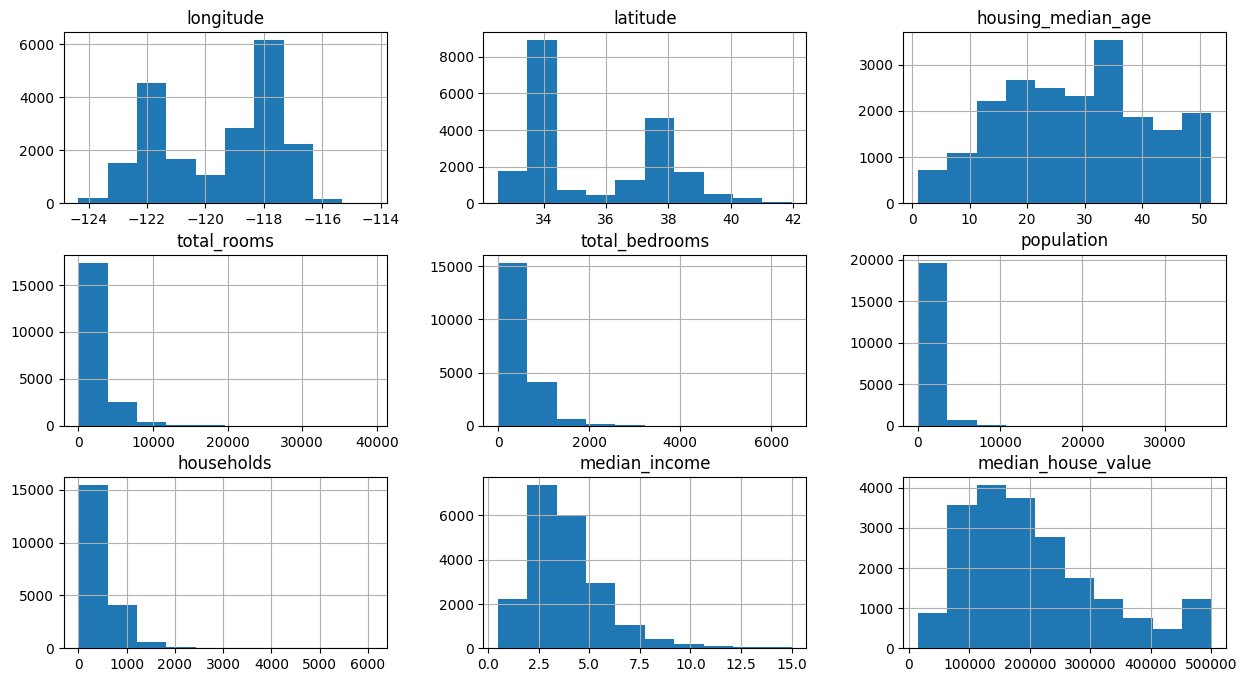

In [ ]:
df_raw.hist(figsize = (15,8))

Since, the data for 'total_rooms','total_bedrooms','population', and 'households' are left-skewed, we can use logarithmic transformation to reduce the skewness for data visualization.

In [ ]:
df_raw.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df_raw['total_rooms'] = np.log(df_raw['total_rooms'] + 1)
df_raw['total_bedrooms'] = np.log(df_raw['total_bedrooms'] + 1)
df_raw['households'] = np.log(df_raw['households'] + 1)
df_raw['population'] = np.log(df_raw['population'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

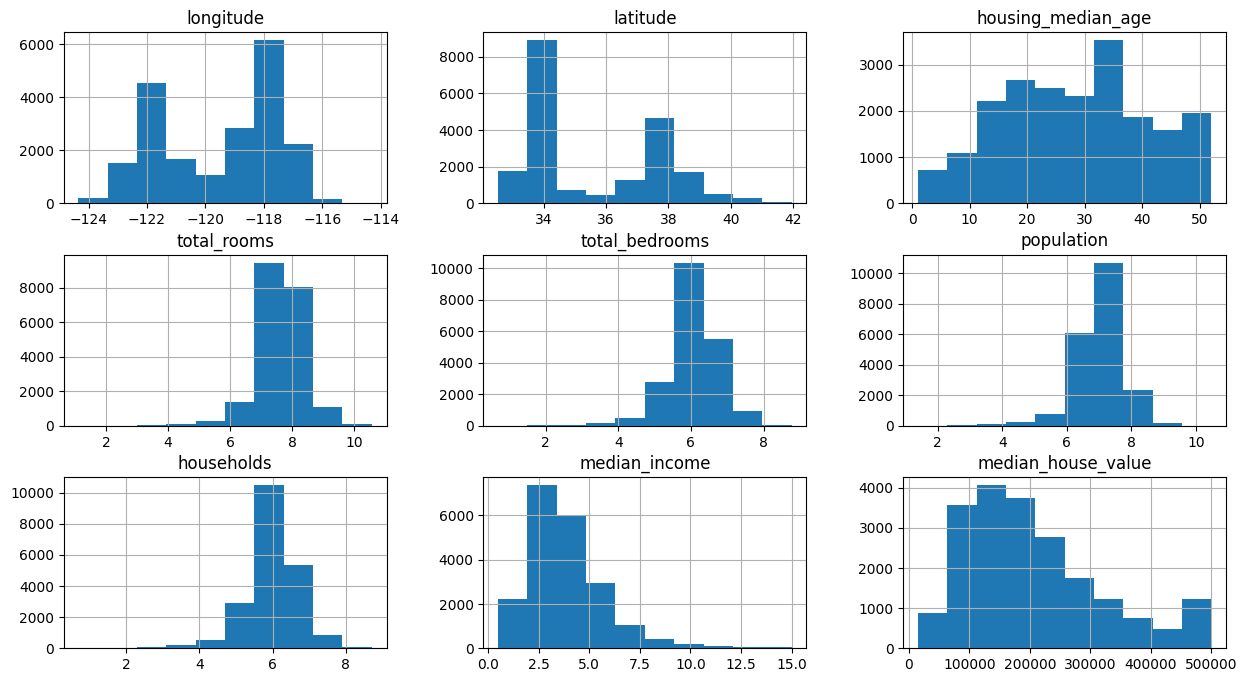

In [ ]:
df_raw.hist(figsize = (15,8))

**Creating a heatmap for correlation analysis between features and target variables**

<ipython-input-55-cd3116c3c453>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_raw.corr(), annot = True, cmap = 'YlGnBu')


<Axes: >

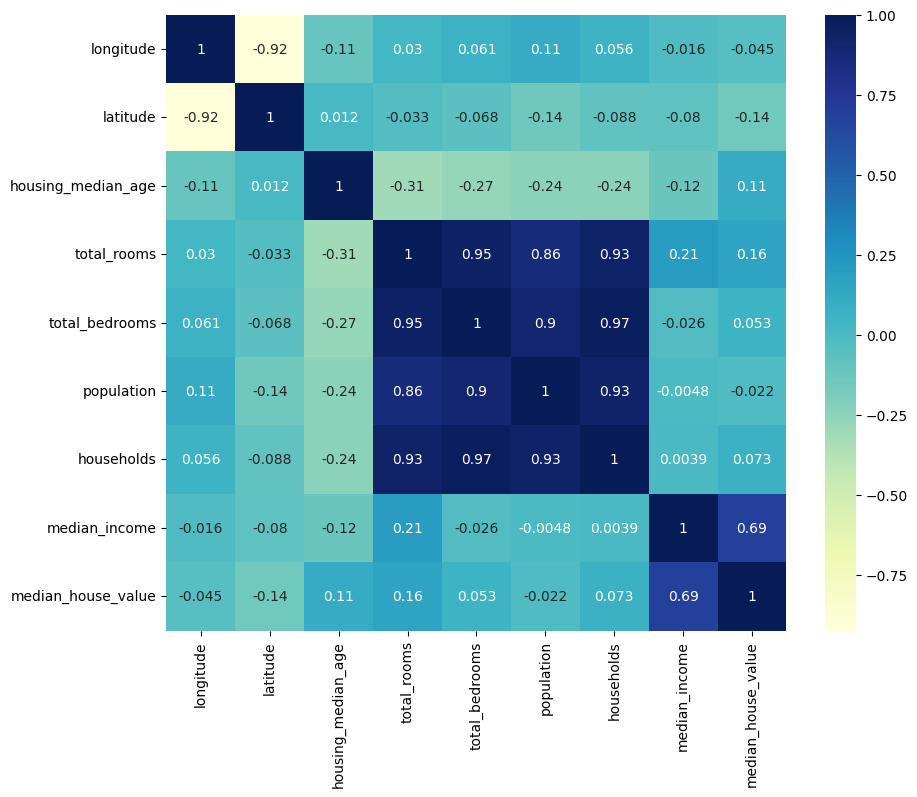

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df_raw.corr(), annot = True, cmap = 'YlGnBu')

The heatmap demonstrates the feature variable 'median_income' is most correlated value with target variable 'median_house_value'.
That means, the median house value for the houses in this dataset is mostly influenced by median_income.

ScatterPlot to visualize the dataset where the color of each point is determined by the value in 'median_house_value'

<Axes: xlabel='latitude', ylabel='longitude'>

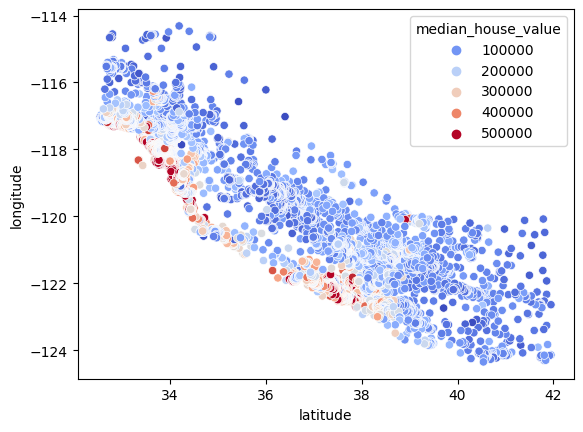

In [ ]:
sns.scatterplot(x = 'latitude', y = 'longitude', data = df_raw, hue = 'median_house_value', palette = 'coolwarm')

From the scatterplot, it can be analyzed that, the 'median_house_value' is higher in specific geographical locations like specific parts in Northern California and Southern California. Also, the proximity of the house near ocean also raises the price.

----
#**Encoding Categorical Values**

----

In [ ]:
df_raw

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,INLAND


Only the column 'ocean_proximity' has values in non-numerical format. We can check how many different kinds of data are in this column.

In [ ]:
unique_oceanproximity = df_raw['ocean_proximity'].unique()
print(unique_oceanproximity)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


Since, there are five unique values in this column, we can use get_dummies method of Panda library to perform one-hot-encoding.

get_dummies is going to create five new columns with each of these unique values, where if the row affirms the specific column, the value will be 1 otherwise 0.

In [ ]:
ocean_prox = pd.get_dummies(df_raw['ocean_proximity'])    # dataframe with onehotencoding of 'ocean_proximity' column.
df_raw = df_raw.join(ocean_prox)                          # Joining it with original dataframe
df_raw.drop(['ocean_proximity'], axis = 1, inplace = True)

In [ ]:
df_raw.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0


----
#**Independent & Dependent Variables**

----

In [ ]:
y = df_raw[['median_house_value']]
X = df_raw.drop(['median_house_value'], axis = 1)

In [ ]:
X.shape, y.shape

((20433, 13), (20433, 1))

----
#**Feature Scaling**

----

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X[3]

array([-1.33729614,  1.03767426,  1.85576873, -0.63824972, -0.81308425,
       -0.94927918, -0.81298831,  0.93297   , -0.8902391 , -0.68271329,
       -0.01564487,  2.82866074, -0.38418614])

----
#**Splitting the dataset to Training & Testing Set**

----

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [ ]:
print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

[[-1.33729614  1.04235526  1.53809403 ... -0.01564487  2.82866074
  -0.38418614]
 [-0.0795154   0.5274452   0.1085579  ... -0.01564487 -0.35352419
  -0.38418614]
 [-1.30734898  1.16874228 -1.87690895 ... -0.01564487  2.82866074
  -0.38418614]
 ...
 [ 0.55935735 -0.72706297  1.85576873 ... -0.01564487 -0.35352419
  -0.38418614]
 [ 1.29805397 -0.79259697  0.02913923 ... -0.01564487 -0.35352419
  -0.38418614]
 [-1.31234017  1.00958826  0.50565127 ... -0.01564487  2.82866074
  -0.38418614]]

[[ 0.69411957 -0.69897696  0.74390729 ... -0.01564487 -0.35352419
  -0.38418614]
 [ 0.68912838 -0.69897696  0.74390729 ... -0.01564487 -0.35352419
  -0.38418614]
 [ 1.15830055 -1.13899102 -1.47981558 ... -0.01564487 -0.35352419
  -0.38418614]
 ...
 [-2.06601037  1.98791738  1.06158199 ... -0.01564487 -0.35352419
   2.60290495]
 [-1.30235778  0.84575324  1.22041933 ... -0.01564487 -0.35352419
   2.60290495]
 [ 0.49447183 -0.67089096  0.50565127 ... -0.01564487 -0.35352419
  -0.38418614]]

       median_

----
#**ML Prediction: median_house_value**

----

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test[2]

array([ 1.15830055, -1.13899102, -1.47981558, -0.00461194,  0.14654951,
        0.20005466,  0.23724803, -0.56604689,  1.12329373, -0.68271329,
       -0.01564487, -0.35352419, -0.38418614])

In [ ]:
y_test.iloc[2]

median_house_value    131300.0
Name: 15433, dtype: float64

In [ ]:
test_prediction = linear_reg.predict(X_test[2].reshape(1, -1))

In [ ]:
print(test_prediction)

[[160186.34455151]]


**Data Visualization**

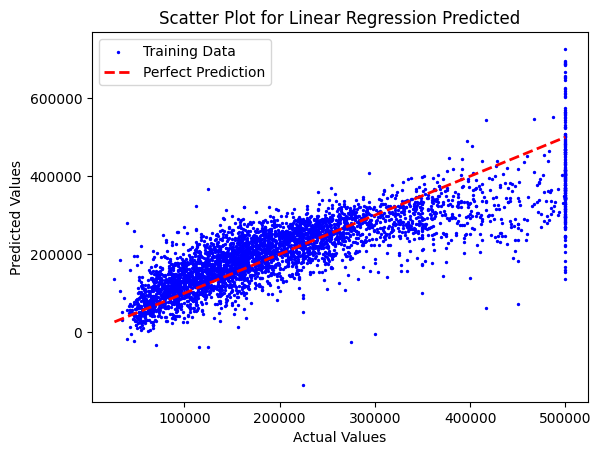

In [ ]:
y_test_values = y_test.values

plt.scatter(y_test_values, linear_reg.predict(X_test), label = "Training Data", color = 'blue', s = 2)

plt.plot([min(y_test_values), max(y_test_values)], [min(y_test_values), max(y_test_values)], color='red', linestyle='--', linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.legend()
plt.title('Scatter Plot for Linear Regression Predicted')

plt.legend()
plt.show()

----
#**Prediction Using Artificial Neural Netowrk**

In [ ]:
y_train_values = y_train.values

In [ ]:
y_train_values

array([[489600.],
       [ 71300.],
       [214800.],
       ...,
       [500001.],
       [ 91200.],
       [126000.]])

In [ ]:
X_train

array([[-1.33729614,  1.04235526,  1.53809403, ..., -0.01564487,
         2.82866074, -0.38418614],
       [-0.0795154 ,  0.5274452 ,  0.1085579 , ..., -0.01564487,
        -0.35352419, -0.38418614],
       [-1.30734898,  1.16874228, -1.87690895, ..., -0.01564487,
         2.82866074, -0.38418614],
       ...,
       [ 0.55935735, -0.72706297,  1.85576873, ..., -0.01564487,
        -0.35352419, -0.38418614],
       [ 1.29805397, -0.79259697,  0.02913923, ..., -0.01564487,
        -0.35352419, -0.38418614],
       [-1.31234017,  1.00958826,  0.50565127, ..., -0.01564487,
         2.82866074, -0.38418614]])

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units= 20, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units= 20, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units= 1, activation = 'linear'))

ann.compile(optimizer = 'RMSprop', loss = 'mean_squared_error', metrics = ['mse'])
ann.fit(X_train, y_train_values, batch_size = 16, epochs = 10)

Epoch 1/10
1022/1022 [==============================] - 5s 4ms/step - loss: 56085000192.0000 - mse: 56085000192.0000
Epoch 2/10
1022/1022 [==============================] - 3s 3ms/step - loss: 55064834048.0000 - mse: 55064834048.0000
Epoch 3/10
1022/1022 [==============================] - 2s 2ms/step - loss: 51828387840.0000 - mse: 51828387840.0000
Epoch 4/10
1022/1022 [==============================] - 2s 2ms/step - loss: 45379264512.0000 - mse: 45379264512.0000
Epoch 5/10
1022/1022 [==============================] - 2s 2ms/step - loss: 35484160000.0000 - mse: 35484160000.0000
Epoch 6/10
1022/1022 [==============================] - 2s 2ms/step - loss: 23720970240.0000 - mse: 23720970240.0000
Epoch 7/10
1022/1022 [==============================] - 2s 2ms/step - loss: 14097833984.0000 - mse: 14097833984.0000
Epoch 8/10
1022/1022 [==============================] - 2s 2ms/step - loss: 9834732544.0000 - mse: 9834732544.0000
Epoch 9/10
1022/1022 [==============================] - 2s 2ms/ste

#Prediction for ANN

In [ ]:
X_test[5]

array([-1.24246346,  1.08916527,  0.66448862, -0.18976443, -0.42013362,
       -0.48125194, -0.36352869,  0.22142401, -0.8902391 , -0.68271329,
       -0.01564487,  2.82866074, -0.38418614])

In [ ]:
y_test.iloc[5]

median_house_value    189600.0
Name: 1398, dtype: float64

In [ ]:
single_data = X_test[5].reshape(1,-1)
predictions = ann.predict(single_data)
print(predictions)

1/1 [==============================] - 0s 60ms/step
[[14326.136]]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = ann.predict(X_test)

mae = mean_absolute_error(y_test_values, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt(mean_squared_error(y_test_values, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

128/128 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 45938.86835336557
Root Mean Squared Error (RMSE): 64923.39929399636
